## Task 1 - Diabetes Dataset



a. Load the datasets into NumPy or Pandas objects.

In [211]:
# Importing dataset, neccessary libraries and creating DataFrame
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(f"Features: {list(diabetes.feature_names)}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [212]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


b. Determine whether the data needs to be cleaned, and if so, clean it. Check for missing
features. Check for erroneous values and mssing values. If there are missing values, you can
adopt the simplest approach and delete them. Alternatively you can explore other approaches
such as imputation (e.g., using the average of the observed vlaues).

Here, we will perform data preprocessing and clean our dataset by checking for:
1. data types
2. missing values
3. duplicates - remove if any
4. outliers

In [213]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [214]:
# Check data types and convert if neceassary
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [215]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any 
df = df.drop_duplicates()

Duplicate rows: 0


In [221]:
# Iterative outlier removal using IQR method
print("ITERATIVE OUTLIER REMOVAL:")
print("="*60)

# Initial outlier count
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"\nIteration 0 (Original):")
print(f"  Shape: {df.shape}")
print(f"  Total rows with outliers: {outliers_mask.sum()}")
print(f"  Outliers per column:\n{outlier_counts}")

# Iteratively remove outliers until none remain
df_clean = df.copy()
iteration = 1
max_iterations = 10  # Safety limit -- prevent removing too much data

while True:
    # Calculate IQR bounds on current cleaned data
    Q1_iter = df_clean.quantile(0.25)
    Q3_iter = df_clean.quantile(0.75)
    IQR_iter = Q3_iter - Q1_iter
    
    # Find outliers
    outliers_mask_iter = ((df_clean < (Q1_iter - 1.5 * IQR_iter)) | 
                          (df_clean > (Q3_iter + 1.5 * IQR_iter))).any(axis=1)
    outlier_count_iter = outliers_mask_iter.sum()
    
    # If no outliers or max iterations reached, stop
    if outlier_count_iter == 0 or iteration > max_iterations:
        break
    
    # Remove outliers
    df_clean = df_clean[~outliers_mask_iter]
    
    print(f"\nIteration {iteration}:")
    print(f"  Shape: {df_clean.shape}")
    print(f"  Rows removed: {outlier_count_iter}")
    
    iteration += 1

# Final check
Q1_final = df_clean.quantile(0.25)
Q3_final = df_clean.quantile(0.75)
IQR_final = Q3_final - Q1_final
outlier_counts_final = ((df_clean < (Q1_final - 1.5 * IQR_final)) | 
                        (df_clean > (Q3_final + 1.5 * IQR_final))).sum()

print(f"\n{'='*60}")
print("FINAL RESULT:")
print(f"  Original shape: {df.shape}")
print(f"  Final shape: {df_clean.shape}")
print(f"  Total rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"  Outliers per column (final):\n{outlier_counts_final}")
print(f"\nData is now clean with 0 outliers by IQR method.")

# Store cleaned dataframe
df_no_outliers = df_clean


ITERATIVE OUTLIER REMOVAL:

Iteration 0 (Original):
  Shape: (442, 11)
  Total rows with outliers: 31
  Outliers per column:
age       0
sex       0
bmi       3
bp        0
s1        8
s2        7
s3        7
s4        2
s5        4
s6        9
target    0
dtype: int64

Iteration 1:
  Shape: (411, 11)
  Rows removed: 31

Iteration 2:
  Shape: (395, 11)
  Rows removed: 16

FINAL RESULT:
  Original shape: (442, 11)
  Final shape: (395, 11)
  Total rows removed: 47
  Outliers per column (final):
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Data is now clean with 0 outliers by IQR method.


c. Conduct a statistical analysis of the data. Explore the means of the features and the max
and min values. Consider whether this might imply that performing some scaling could be
beneficial. Use box plots, histograms, and scatter plots to explore the distributions of the
data. For example, is one of the features concentrated around one mode? Two modes? Does
the empirical distribution exhibit heavy tails or is it closer to Gaussian? Are some features
discrete/categorical? Are some of the features correlated?

In [222]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\n" + "="*60)
print("Detailed Statistics:")
print("="*60)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")
    print(f"  Kurtosis: {df[col].kurtosis():.4f}")

Statistical Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e

Correlation Matrix:
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4   

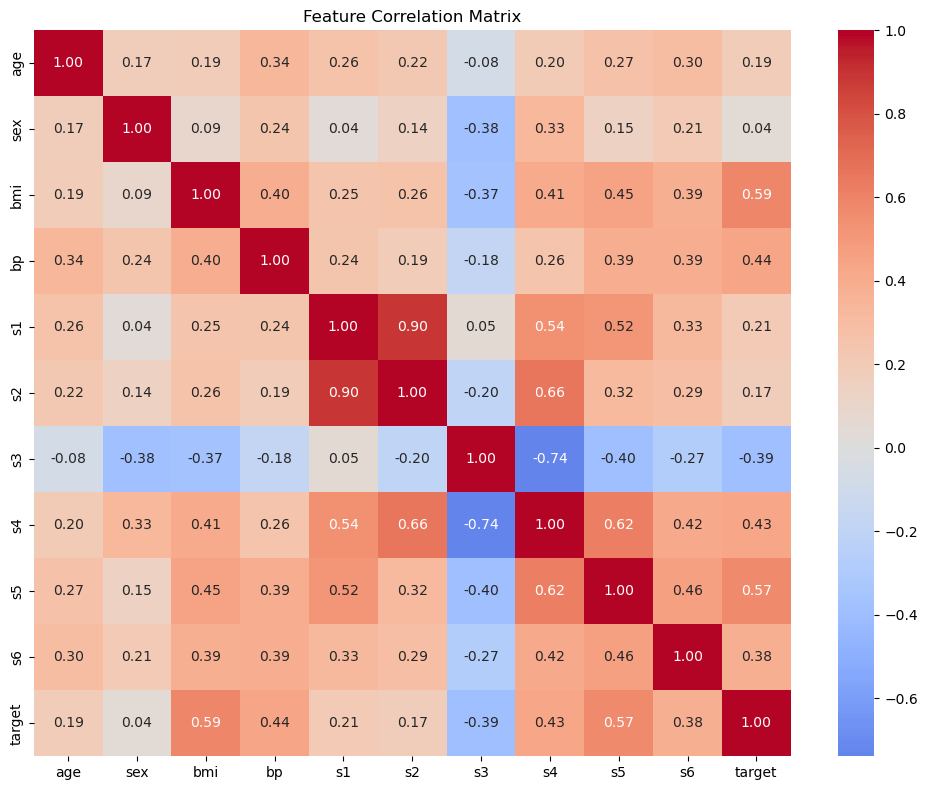


Highly correlated feature pairs (|correlation| > 0.7):
s1 <-> s2: 0.8967
s3 <-> s4: -0.7385


In [219]:
# Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\nHighly correlated feature pairs (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.4f}")

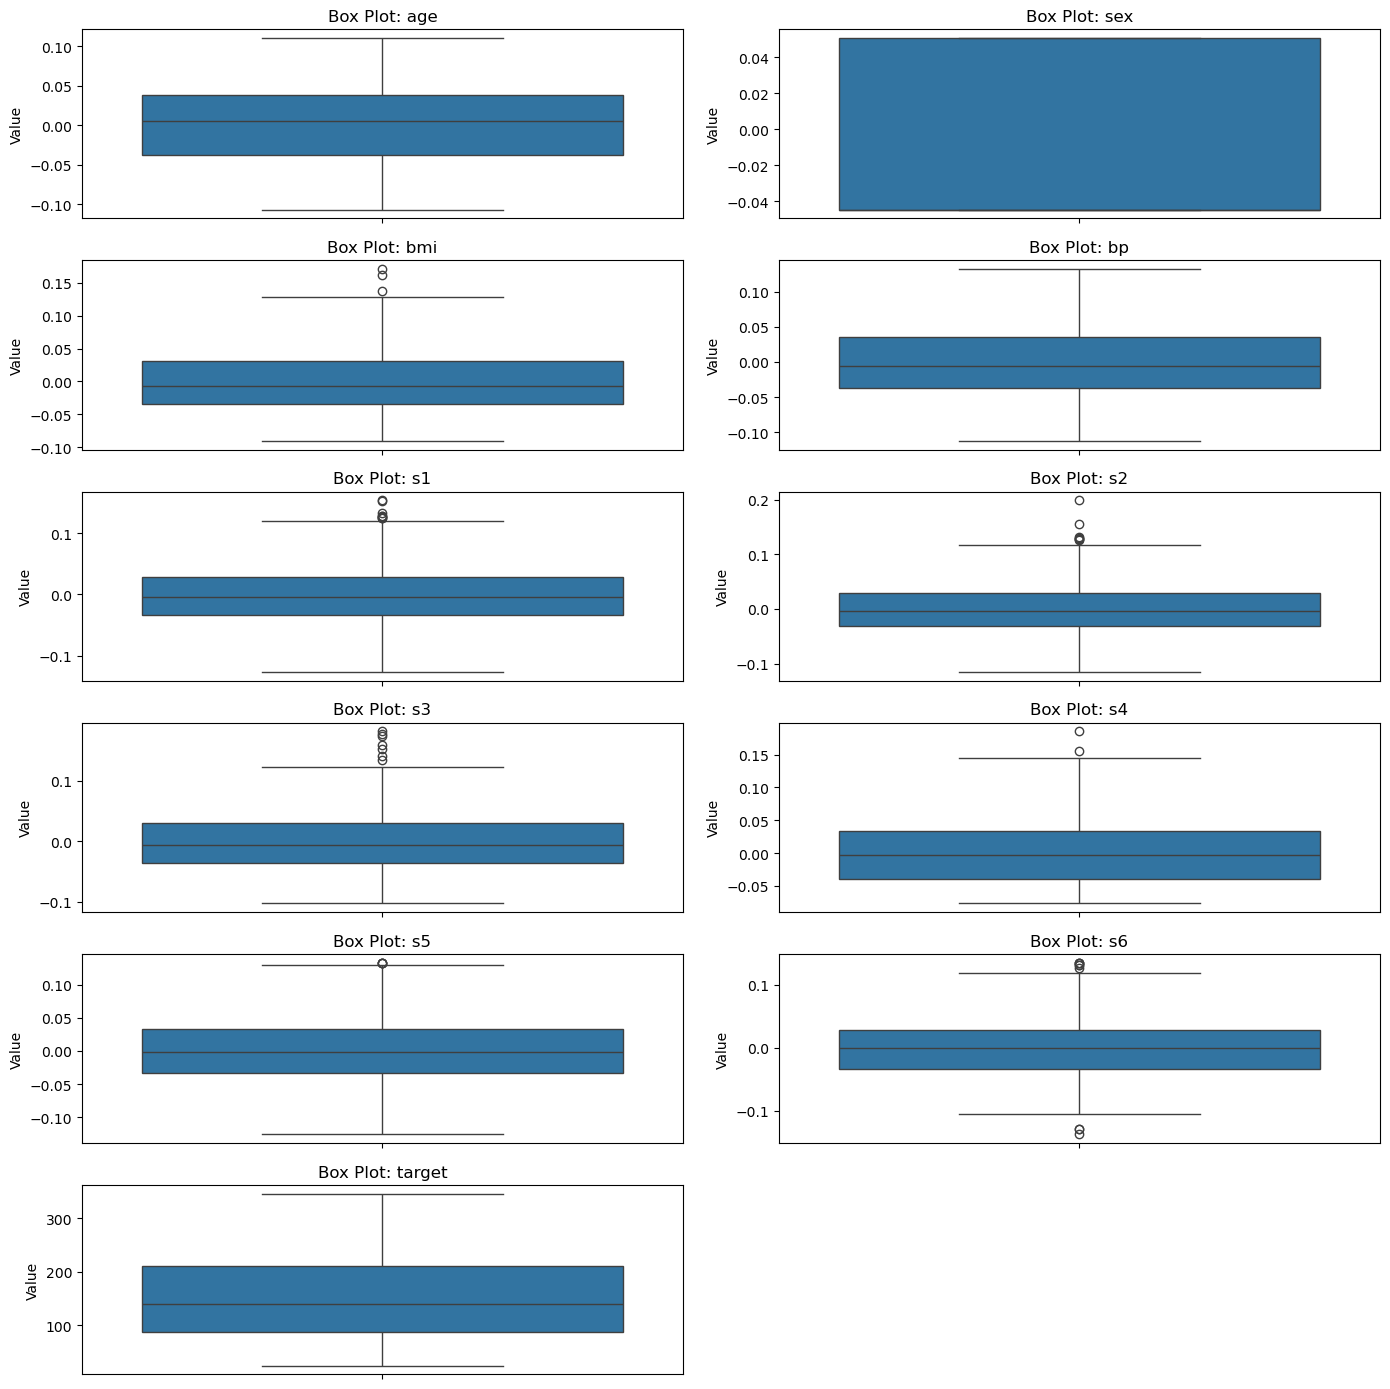


Box plots show potential outliers (dots outside whiskers) and distribution skewness.


In [226]:
# Box plots for each feature (to detect outliers and distribution)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel('Value')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nBox plots show potential outliers (dots outside whiskers) and distribution skewness.")


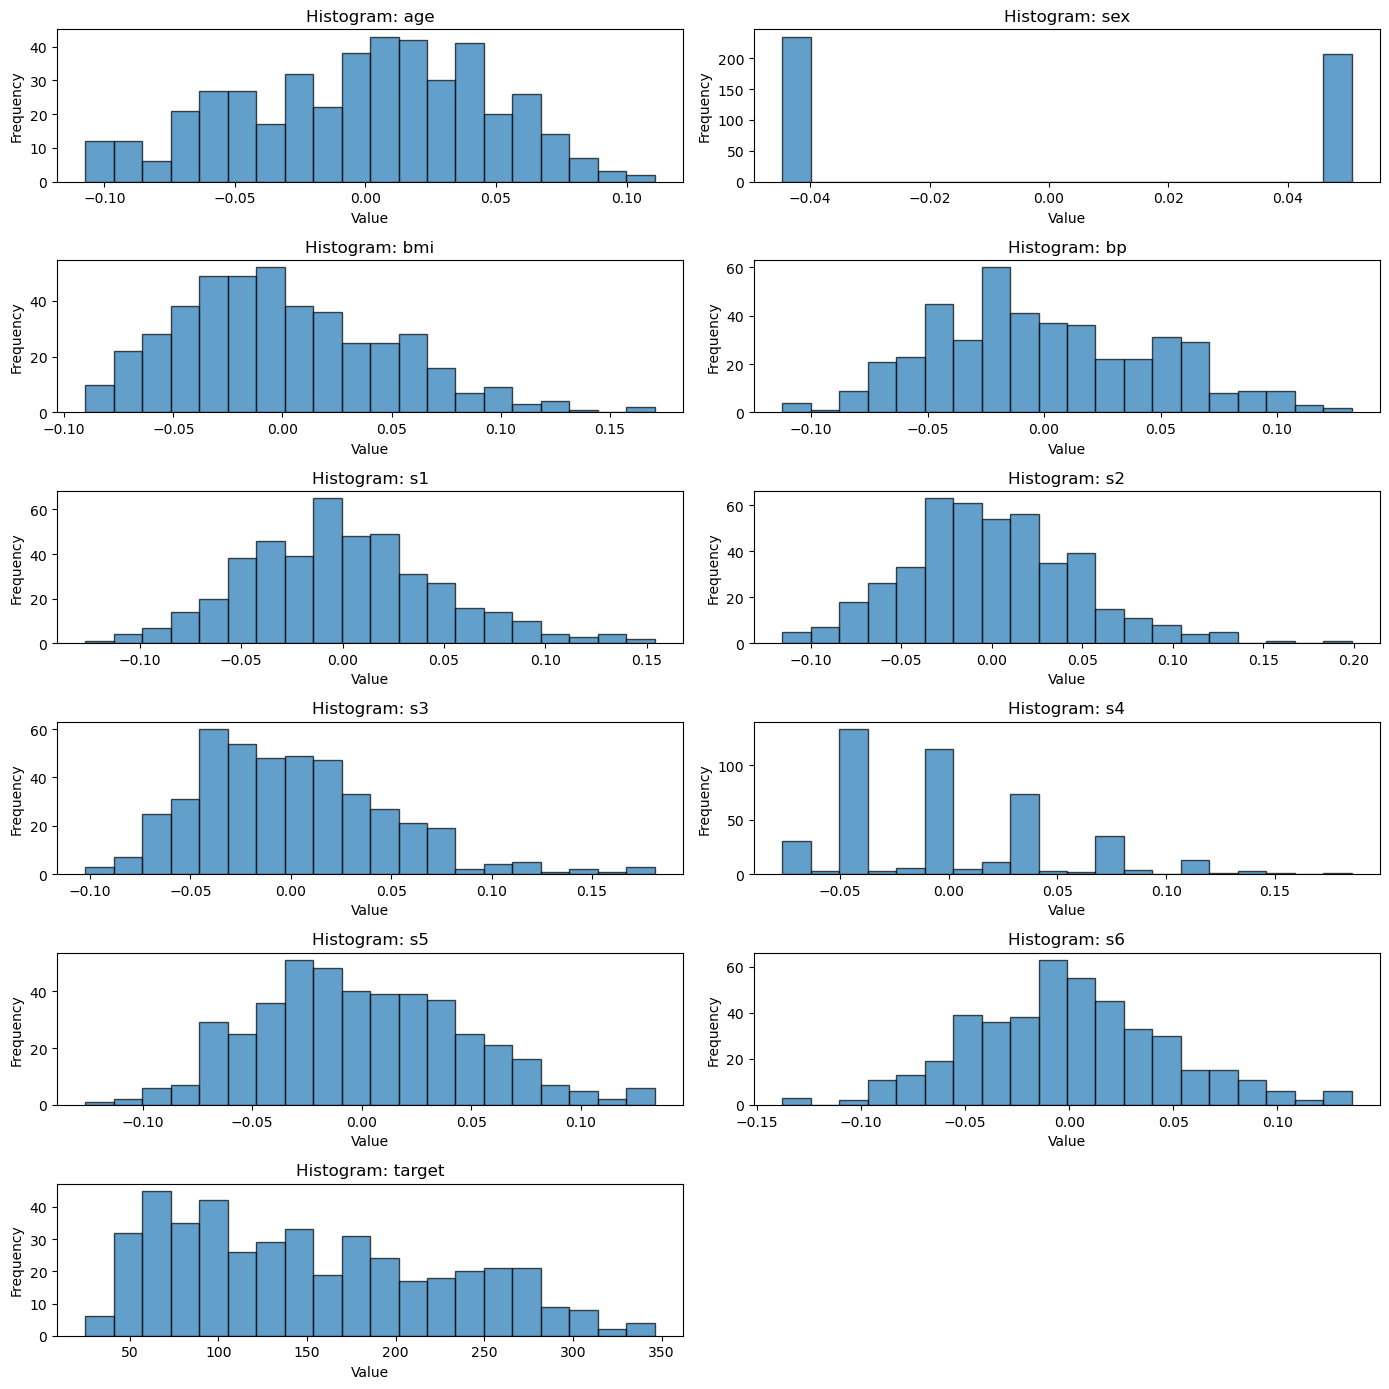


Histograms show the distribution shape (Gaussian, skewed, multimodal, etc.)


In [227]:
# Histograms for each feature (to explore distributions)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nHistograms show the distribution shape (Gaussian, skewed, multimodal, etc.)")


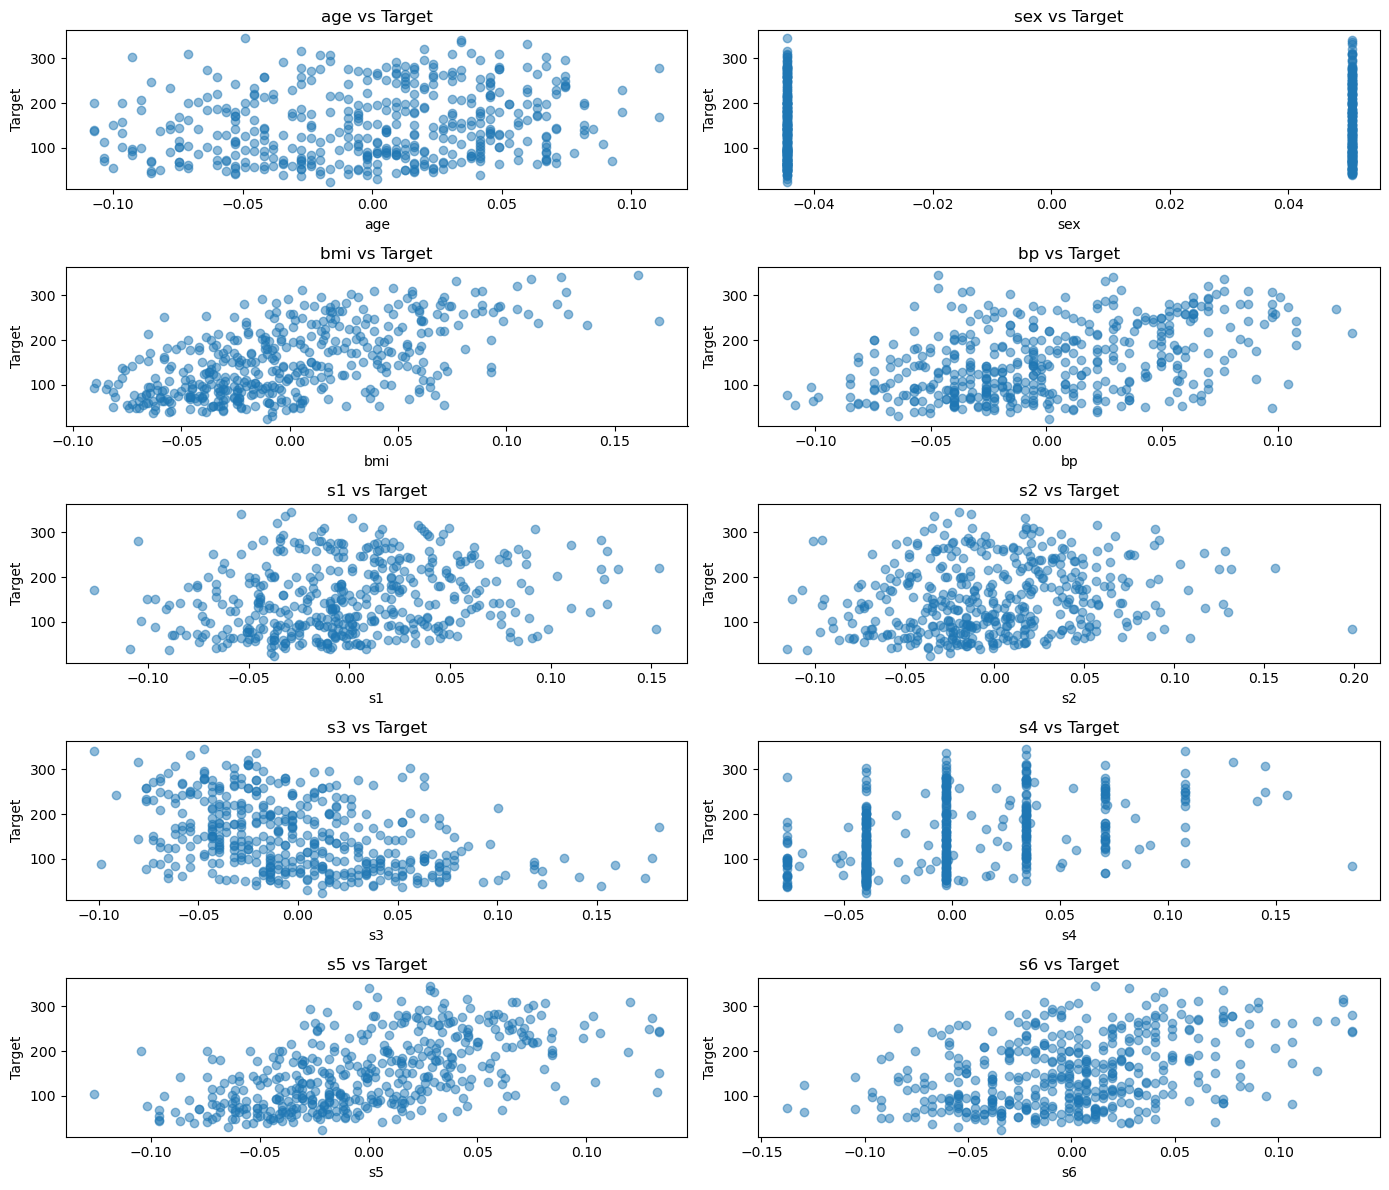


Scatter plots show relationships between features and target variable.


In [228]:
# Scatter plots (features vs target)
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['target'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Target')
    axes[idx].set_title(f'{col} vs Target')

plt.tight_layout()
plt.show()

print("\nScatter plots show relationships between features and target variable.")

In [229]:
# Scaling analysis - check range of features
print("Feature Ranges:")
print("="*60)
for col in df.columns[:-1]:  # Exclude target
    print(f"{col}: [{df[col].min():.4f}, {df[col].max():.4f}]")

print("\nConclusion on Scaling:")
print("Features have different ranges. Scaling is BENEFICIAL because:")
print("- Different features have vastly different value ranges")
print("- This can affect distance-based algorithms (KNN, SVM, etc.)")
print("- Standardization (z-score normalization) is recommended")

# Apply standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['target'] = df['target'].values

print("\nScaled data statistics (should be mean≈0, std≈1):")
print(df_scaled.describe())

Feature Ranges:
age: [-0.1072, 0.1107]
sex: [-0.0446, 0.0507]
bmi: [-0.0903, 0.1706]
bp: [-0.1124, 0.1320]
s1: [-0.1268, 0.1539]
s2: [-0.1156, 0.1988]
s3: [-0.1023, 0.1812]
s4: [-0.0764, 0.1852]
s5: [-0.1261, 0.1336]
s6: [-0.1378, 0.1356]

Conclusion on Scaling:
Features have different ranges. Scaling is BENEFICIAL because:
- Different features have vastly different value ranges
- This can affect distance-based algorithms (KNN, SVM, etc.)
- Standardization (z-score normalization) is recommended

Scaled data statistics (should be mean≈0, std≈1):
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   8.037814e-18  1.607563e-17 -2.813235e-17 -1.607563e-17 -8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706